## Step 1: Setup – Imports & State

In [9]:
from langgraph.graph import StateGraph, START, END
from pydantic import BaseModel
from typing import Annotated
from langgraph.graph.message import add_messages
import random

## State object: where all information lives
class State(BaseModel):
    messages: Annotated[list, add_messages]  # Reducer appends new messages

## Step 2: Define Nodes
#### A Node = Function that takes State and returns State.

In [10]:
# Node 1
def greeter(state: State) -> State:
    msg = f"Hello! I am your graph assistant."
    return {"messages": [msg]}

# Node 2
def random_fact(state: State) -> State:
    facts = [
        "Bananas are berries, but strawberries are not.",
        "Octopuses have three hearts.",
        "Penguins propose with pebbles.",
        "Cabbages have more chromosomes than humans!"
    ]
    fact = random.choice(facts)
    msg = f"Did you know? {fact}"
    return {"messages": [msg]}

# Node 3
def farewell(state: State) -> State:
    msg = f"Goodbye! Graph run complete."
    return {"messages": [msg]}

## Step 3: Build the Graph (Nodes + Edges)

In [20]:
# Build the graph
graph_builder = StateGraph(State)

# Add nodes
graph_builder.add_node("greeter", greeter)
graph_builder.add_node("random_fact", random_fact)
graph_builder.add_node("farewell", farewell)

# Connect nodes with edges
graph_builder.add_edge(START, "greeter")
graph_builder.add_edge("greeter", "random_fact")
graph_builder.add_edge("random_fact", "farewell")
graph_builder.add_edge("farewell", END)

## Step 4: Compile & Run

In [21]:
# Compile the graph
graph = graph_builder.compile()

# Run with empty state
initial_state = {"messages": []}
final_state = graph.invoke(initial_state)

print("=== Final Output ===")
for m in final_state["messages"]:
    print(m)


=== Final Output ===
content='Hello! I am your graph assistant.' additional_kwargs={} response_metadata={} id='ff69f658-1fa5-4b0d-a07c-3e923c41282f'
content='Did you know? Cabbages have more chromosomes than humans!' additional_kwargs={} response_metadata={} id='2b45827b-eef4-4365-84c8-16f9fd2e3a30'
content='Goodbye! Graph run complete.' additional_kwargs={} response_metadata={} id='17ff06f2-5a95-4eff-98d0-06538795922f'


### Display the Graph Layout

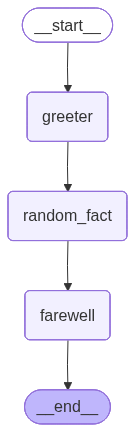

In [22]:
# Visualize graph (requires graphviz)
from IPython.display import Image

display(Image(graph.get_graph().draw_mermaid_png()))